In [1]:
# loading data
from tensorflow.keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10_000)

print(f"shape: {x_train.shape}")

shape: (8982,)


In [2]:
# vectorizing data -> multi-hot encode
import numpy as np

def vectorize_sequences(sequences, dimensions=10_000):
    result = np.zeros(shape=(len(sequences), dimensions)) # samples, features
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i, j] = 1.
    return result

In [3]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [4]:
print(f"first label: {y_train[0]}")

first label: 3


In [5]:
np.max(y_train)

45

In [6]:
# labels have to be one hot encoded (to_categorical)
def to_one_hot(labels, dimensions=46): # there 46 classes -> 0 to 45
    result = np.zeros(shape=(len(labels), dimensions)) # datapoint (range), label
    for i, label in enumerate(labels):
        result[i, label] = 1. # class -> label index
    return result

In [7]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

print(f"first label: {y_train[0]}")

first label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# build the model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

In [9]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
# extracting validation data
x_val = x_train[:1_000]
y_val = y_train[:1_000]

x_train = x_train[1_000:]
y_train = y_train[1_000:]

In [11]:
# train the model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 2.7190 - accuracy: 0.4867 - val_loss: 1.8401 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 56ms/step - loss: 1.4904 - accuracy: 0.7062 - val_loss: 1.3234 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0721 - accuracy: 0.7803 - val_loss: 1.1361 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8329 - accuracy: 0.8307 - val_loss: 1.0366 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6611 - accuracy: 0.8693 - val_loss: 0.9730 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5262 - accuracy: 0.8963 - val_loss: 0.9331 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4273 - accuracy: 0.9144 - val_loss: 0.8935 - val_accuracy: 0.8190
Epoch 8/20
16

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

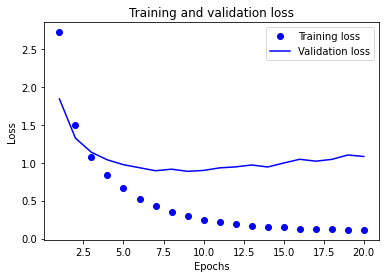

In [13]:
import matplotlib.pyplot as plt

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

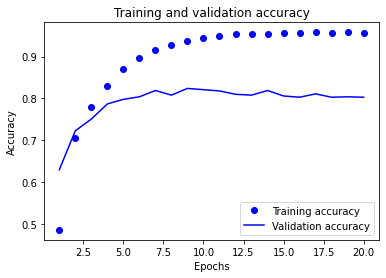

In [15]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# Use sparse_categorical_crossentropy
Instead of one-hot-encoding, we can vectorize the labels as integers and use sparse_categorical_corssentropy as loss

In [16]:
# load data and get "right" shape
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10_000)

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [17]:
# model
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
# extracting validation data
x_val = x_train[:1_000]
y_val = y_train[:1_000]

x_train = x_train[1_000:]
y_train = y_train[1_000:]

In [19]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 2.8064 - accuracy: 0.5117 - val_loss: 1.8994 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 1.5252 - accuracy: 0.7002 - val_loss: 1.3552 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.1059 - accuracy: 0.7663 - val_loss: 1.1529 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 63ms/step - loss: 0.8649 - accuracy: 0.8196 - val_loss: 1.0440 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6868 - accuracy: 0.8568 - val_loss: 0.9669 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5433 - accuracy: 0.8909 - val_loss: 0.9502 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 61ms/step - loss: 0.4393 - accuracy: 0.9107 - val_loss: 0.9145 - val_accuracy: 0.8040
Epoch 8/20
16

In [20]:
res = history.history
res.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

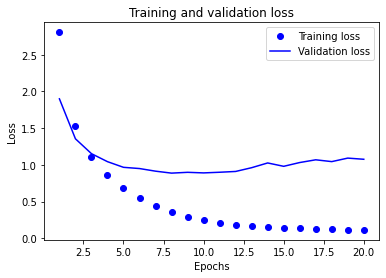

In [21]:
loss = res["loss"]
val_loss = res["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

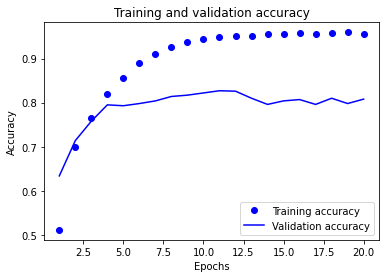

In [22]:
acc = res["accuracy"]
val_acc = res["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()